In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving melb_data.csv to melb_data.csv


In [3]:
df = pd.read_csv("melb_data.csv")
d = pd.read_csv("melb_data.csv")

In [4]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [5]:
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,4.0,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [6]:
#Data Given :
#Rooms	Number of rooms
#Type	Property type
#Price	Price in dollars
#Method	Property status
#SellerG	Real Estate Agent
#Distance	Distance from CBD
#Postcode	Code of the area
#Bathroom	Number of Bathrooms
#Car	Number of carspots
#Landsize	Land Size
#BuildingArea	Building Size
#YearBuilt	The year in which home was built
#CouncilArea	Governing council for the area
#Longtitude	The angular distance of a place east or west
#Regionname	General Region (West, North West, North, Northeast …etc)
#PropertyCount	Number of properties that exist in the suburb

In [7]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [8]:
# dropping column with building area as almost half of the data is missing.
# df.drop(['BuildingArea','Address'],axis=1)

In [9]:
#Replaced the nan value in the BuildingArea with mean
df['BuildingArea'].replace({np.nan:df['BuildingArea'].mean()},inplace=True)

df['CouncilArea']=df['CouncilArea'].replace(np.NaN,0)

#Replaced the nan value in the car with YearBuilt
df['YearBuilt'].replace({np.NaN:df['YearBuilt'].mean()},inplace=True)

#Replaced the nan value in the car with mode value ie,2
df.Car.replace({np.nan:2},inplace=True)

In [10]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [12]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.611856,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.960793,3990.669241,392.002962,28.972246,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,122.000000,1960.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,151.967650,1964.684217,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,151.967650,1975.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13580 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   13580 non-null  float64
 15  YearBuilt      13580 non-null  float64
 16  CouncilArea    13580 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

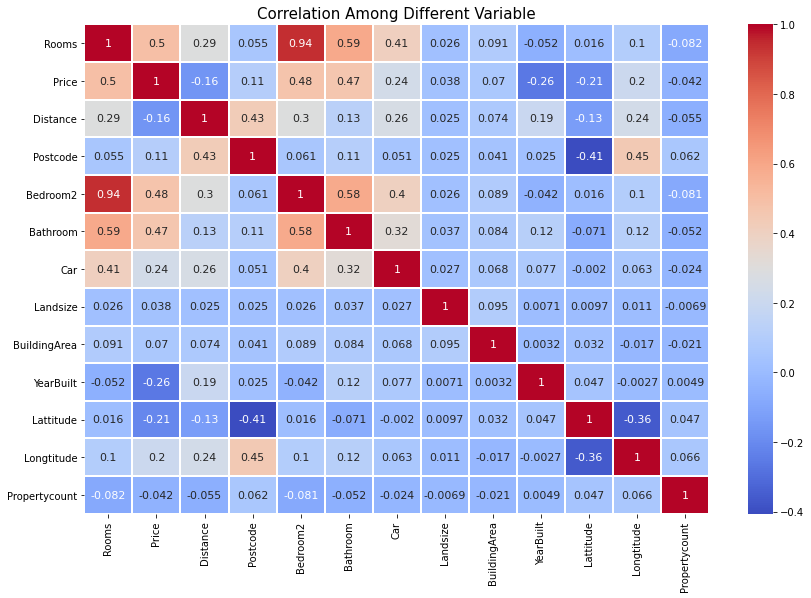

In [14]:
# Prepare the data for correlation
corr=df.corr()

# Relation between different variable
fig,ax=plt.subplots(figsize=(14,9))
sns.heatmap(corr,annot=True,cmap = 'coolwarm',linewidth = 1,annot_kws={"size": 11})
plt.title("Correlation Among Different Variable",size=15);

Text(0.5, 1.0, 'Price vs Type')

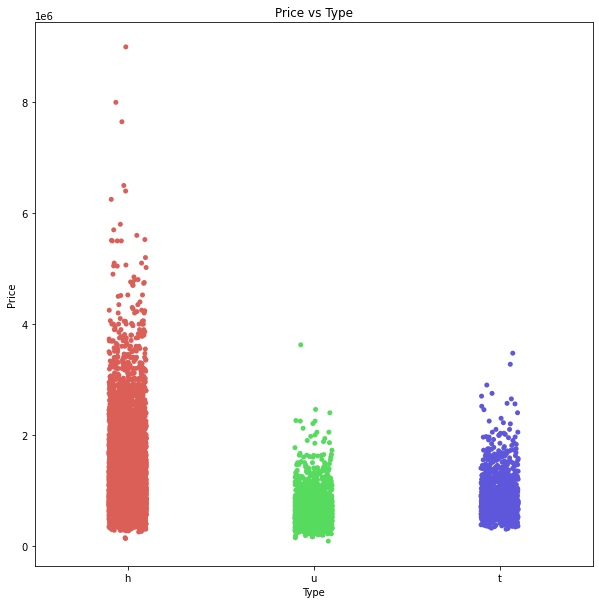

In [15]:
plt.figure(figsize=(10,10))
sns.stripplot(x=df['Type'],y=df['Price'],palette='hls').set_title('Price vs Type')

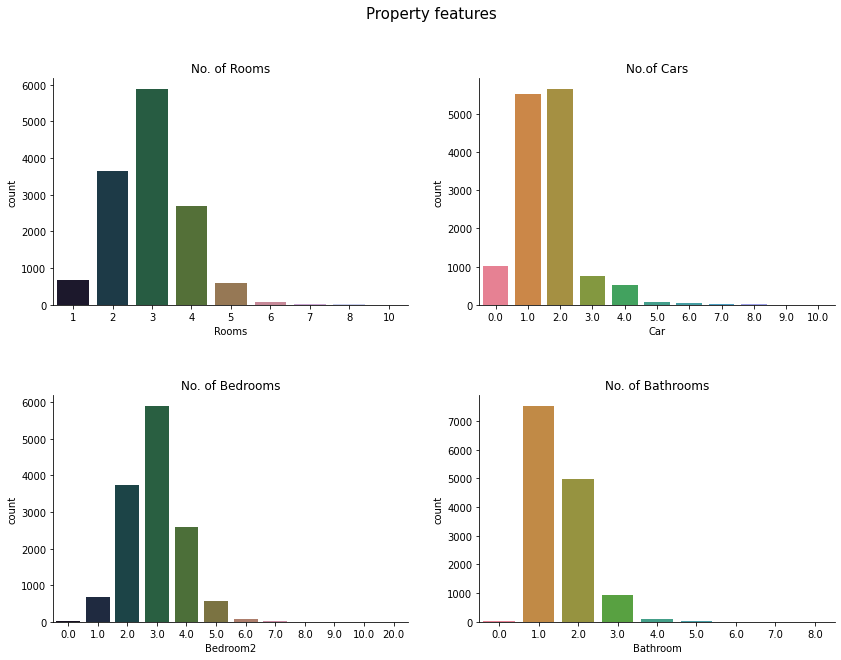

In [16]:
fig, axarr = plt.subplots(2, 2, figsize=(14,10))
fig.suptitle('Property features',fontsize=15)
sns.countplot(df['Rooms'],ax=axarr[0][0],palette='cubehelix').set_title('No. of Rooms')
sns.countplot(df['Bedroom2'],ax=axarr[1][0],palette='cubehelix').set_title('No. of Bedrooms')
sns.countplot(df['Bathroom'],ax=axarr[1][1],palette='husl').set_title('No. of Bathrooms')
sns.countplot(df['Car'],ax=axarr[0][1],palette='husl').set_title('No.of Cars')
plt.subplots_adjust(hspace=.4)
sns.set_style('darkgrid')
sns.despine()

In [17]:
df['CouncilArea'].unique()

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', 0, 'Knox',
       'Maroondah', 'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik',
       'Whittlesea', 'Frankston', 'Macedon Ranges', 'Yarra Ranges',
       'Wyndham', 'Cardinia', 'Unavailable', 'Moorabool'], dtype=object)

In [18]:
def clean_price(x):
  x = str(x)
  x = x.replace("0","zero")
  return str(x)

In [19]:
df["CouncilArea"] = df["CouncilArea"].map(clean_price)

In [20]:
df.drop(['Address','Date'], axis = 1, inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Rooms          13580 non-null  int64  
 2   Type           13580 non-null  object 
 3   Price          13580 non-null  float64
 4   Method         13580 non-null  object 
 5   SellerG        13580 non-null  object 
 6   Distance       13580 non-null  float64
 7   Postcode       13580 non-null  float64
 8   Bedroom2       13580 non-null  float64
 9   Bathroom       13580 non-null  float64
 10  Car            13580 non-null  float64
 11  Landsize       13580 non-null  float64
 12  BuildingArea   13580 non-null  float64
 13  YearBuilt      13580 non-null  float64
 14  CouncilArea    13580 non-null  object 
 15  Lattitude      13580 non-null  float64
 16  Longtitude     13580 non-null  float64
 17  Regionname     13580 non-null  object 
 18  Proper

In [21]:
df_num = df.select_dtypes(["int64","float64"])
df_cat = df.select_dtypes("object")

In [22]:
df_num.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,-37.7996,144.9984,4019.0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,-37.8079,144.9934,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,-37.8093,144.9944,4019.0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,-37.7969,144.9969,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,-37.8072,144.9941,4019.0


In [24]:
df_cat.head()

,Suburb,Type,Method,SellerG,CouncilArea,Regionname
0,Abbotsford,h,S,Biggin,Yarra,Northern Metropolitan
1,Abbotsford,h,S,Biggin,Yarra,Northern Metropolitan
2,Abbotsford,h,SP,Biggin,Yarra,Northern Metropolitan
3,Abbotsford,h,PI,Biggin,Yarra,Northern Metropolitan
4,Abbotsford,h,VB,Nelson,Yarra,Northern Metropolitan


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
for col in df_cat:
  le = LabelEncoder()
  df_cat[col] = le.fit_transform(df_cat[col])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
df_cat.head()

,Suburb,Type,Method,SellerG,CouncilArea,Regionname
0,0,0,1,23,31,2
1,0,0,1,23,31,2
2,0,0,3,23,31,2
3,0,0,0,23,31,2
4,0,0,4,155,31,2


In [28]:
df_new = pd.concat([df_num,df_cat],axis=1)

In [29]:
df_new.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Suburb,Type,Method,SellerG,CouncilArea,Regionname
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,-37.7996,144.9984,4019.0,0,0,1,23,31,2
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,-37.8079,144.9934,4019.0,0,0,1,23,31,2
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,-37.8093,144.9944,4019.0,0,0,3,23,31,2
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,-37.7969,144.9969,4019.0,0,0,0,23,31,2
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,-37.8072,144.9941,4019.0,0,0,4,155,31,2


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [31]:
X = df_new.drop("Price",axis=1)
y = df["Price"]

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [33]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# Train score
lr.score(X_train,y_train)

0.5819003970611216

In [35]:
#Test score
lr.score(X_test,y_test)

0.2901404271527054

In [36]:
lr.coef_

array([ 1.45607186e+05, -4.81954674e+04,  9.32695765e+02,  1.56696664e+04,
        2.17728520e+05,  4.58445848e+04,  1.59831856e+01,  5.14378193e+02,
       -2.83734591e+03, -9.26729631e+05,  1.12471725e+06,  4.12494561e-01,
       -3.78679627e+02, -2.17300292e+05, -7.77233634e+03, -1.82523291e+02,
       -2.13385373e+03,  3.34244843e+04])

In [38]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [39]:
# Ridge Regularization
l2 = Ridge(100)
l2.fit(X_train,y_train)
l2.coef_

array([ 1.38910141e+05, -4.80175470e+04,  1.43996159e+03,  2.80776522e+04,
        2.20728955e+05,  4.86815545e+04,  1.39036890e+01,  5.37393743e+02,
       -3.15083327e+03, -3.75269570e+05,  4.85539625e+05, -8.73845325e-02,
       -5.01171553e+02, -1.99404754e+05, -8.64631793e+03, -1.96819255e+02,
       -3.10986135e+03,  2.32382390e+04])

In [40]:
# Lasso helps in feature selection
l1 = Lasso(500)
l1.fit(X_train,y_train)
l1.coef_

array([ 1.45839670e+05, -4.81063126e+04,  9.86528294e+02,  1.57140999e+04,
        2.17872861e+05,  4.57000316e+04,  1.57313160e+01,  5.18433987e+02,
       -2.87655372e+03, -8.40852544e+05,  1.07401808e+06,  3.42357102e-01,
       -3.92325507e+02, -2.15047659e+05, -7.45852879e+03, -1.82498882e+02,
       -2.22465471e+03,  3.29897248e+04])

In [41]:
for i in range(50):
  l2 = Ridge(alpha=i)
  l2.fit(X_train,y_train)
  print(i,":",l2.score(X_test,y_test))

0 : 0.29014042715263444
1 : 0.2893549722324765
2 : 0.2885702152285111
3 : 0.2877869282879334
4 : 0.28700578290959
5 : 0.28622736360232337
6 : 0.2854521792910384
7 : 0.2846806729245398
8 : 0.2839132296314678
9 : 0.28315018369161105
10 : 0.2823918245317347
11 : 0.2816384019109034
12 : 0.28089013042717814
13 : 0.28014719345191597
14 : 0.27940974657814
15 : 0.2786779206538149
16 : 0.2779518244585636
17 : 0.27723154707275954
18 : 0.27651715997972215
19 : 0.27580871893557635
20 : 0.2751062656359916
21 : 0.27440982920480317
22 : 0.27371942752578604
23 : 0.27303506843609393
24 : 0.27235675079721167
25 : 0.2716844654572568
26 : 0.27101819611665856
27 : 0.27035792010770066
28 : 0.26970360909721836
29 : 0.2690552297204727
30 : 0.26841274415343963
31 : 0.26777611062974427
32 : 0.26714528390792824
33 : 0.266520215693959
34 : 0.26590085502342886
35 : 0.2652871486073971
36 : 0.2646790411453883
37 : 0.26407647560870673
38 : 0.2634793934968649
39 : 0.2628877350697162
40 : 0.2623014395575053
41 : 0.2617

In [42]:
for i in range(200,500,50):
  l1 = Lasso(alpha=i)
  l1.fit(X_train,y_train)
  print(i,":",l1.score(X_test,y_test))

200 : 0.28763143845585437
250 : 0.2869933831906637
300 : 0.2863511052465231
350 : 0.28570449624002947
400 : 0.2850535537824771
450 : 0.28439847296740617


In [43]:
# Final models
l2 = Ridge(alpha=2)
l2.fit(X_train,y_train)
print(l2.score(X_test,y_test))

0.2885702152285111


In [44]:
l2.coef_

array([ 1.45469095e+05, -4.81880176e+04,  9.56079268e+02,  1.59747792e+04,
        2.18047550e+05,  4.59577610e+04,  1.58805333e+01,  5.15182886e+02,
       -2.85166749e+03, -8.98628885e+05,  1.09714540e+06,  3.89807255e-01,
       -3.84328601e+02, -2.16575632e+05, -7.80999991e+03, -1.83018669e+02,
       -2.17769491e+03,  3.30358511e+04])

In [45]:
l1 = Lasso(alpha=2000)
l1.fit(X_train,y_train)
print(l1.score(X_test,y_test))

0.26194963250029557


In [46]:
l1.coef_

array([ 1.46555247e+05, -4.78387771e+04,  1.14802773e+03,  1.58326523e+04,
        2.18303920e+05,  4.52660393e+04,  1.49756378e+01,  5.30598724e+02,
       -2.99417874e+03, -5.83222253e+05,  9.21917456e+05,  1.31956788e-01,
       -4.33262825e+02, -2.08287787e+05, -6.51705386e+03, -1.82424639e+02,
       -2.49704254e+03,  3.16853558e+04])

In [47]:
# Cross Validation

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
l1_cross = cross_val_score(l1,X,y,cv=4)

In [50]:
l1_cross

array([0.60869205, 0.57486712, 0.5734602 , 0.09129809])

In [51]:
l2_cross = cross_val_score(l2,X,y,cv=4)

In [52]:
l2_cross

array([0.61336893, 0.57979532, 0.57636251, 0.14783038])

In [53]:
np.mean(l1_cross)

0.462079364972721

In [54]:
np.mean(l2_cross)

0.47933928588151975